<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Access ACTRIS In-Situ data

In [2]:
# import packages
import pandas as pd
import numpy as np 
import requests
import json

## Get metadata for instrument and country

After searching in the Metadata REST API, one chooses the metadata from certain parameters. 

In this example we get metadata from all filter absorption photometers in Norway. This data is all from the ACTRIS In-Situ Data Centre unit.  

In [41]:
response = requests.get("https://prod-actris-md.nilu.no/Metadata/instrument/filter_absorption_photometer/country/NO") 
metadata_archive = response.json() 

In [42]:
metadata_archive

[{'md_metadata': {'id': 511642,
   'provider_id': 14,
   'file_identifier': 'NO0059G.20140130100000.20160617182836.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.23mo.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc',
   'language': 'en',
   'hierarchy_level': 'dataset',
   'online_resource': {'linkage': 'http://ebas.nilu.no/'},
   'datestamp': '2019-05-14T05:26:35.0000000Z',
   'created': '2021-02-11T14:43:27.0000000Z',
   'contact': [{'first_name': 'Markus',
     'last_name': 'Fiebig',
     'organisation_name': 'Norwegian Institute for Air Research (NILU)',
     'role_code': ['custodian'],
     'country_code': 'NO',
     'delivery_point': 'Insituttveien 18',
     'address_city': 'Kjeller',
     'administrative_area': 'Viken',
     'postal_code': 2007,
     'email': 'ebas@nilu.no',
     'position_name': 'Senior Scientist'}]},
  'md_identification': {'abstract': 'Ground based in situ observations of aerosol_absorption_coefficient at Trollhaugen (NO0059G) usin

In [19]:
files_list = []
for f in metadata_archive:
    url = f['md_distribution_information'][0]['dataset_url']
    files_list.append(url)
files_list

['http://thredds.nilu.no/thredds/dodsC/ebas/NO0059G.20140130100000.20160617182836.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.23mo.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0058G.20100101000000.20181205113000.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.2y.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0058G.20070220000000.20181205113000.filter_absorption_photometer.aerosol_absorption_coefficient.aerosol.3y.1h.NO01L_MISU_PSAP-1W_TRL.NO01L_abs_coeff_MISU_PSAP_Bond_1999.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20150101000000.20160520171653.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.1y.1h.NO01L_MISU_PSAP-1W_BIR_dry.NO01L_abs_coef_MISU_v2.lev0.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20130101000000.20160523103523.filter_absorption_photometer.aerosol_absorption_coefficien

**fileServer** er direkte nedlasting via http, da får du en fysisk netCDF fil.

**dodsC** er opendap protokollen, det er streaming av data i binary form, ingen nedlasting kreves.

In [43]:
for f in files_list: 
    if 'fileServer' in f: 
        files_list.remove(f)
files_list

['http://thredds.nilu.no/thredds/dodsC/ebas/NO0059G.20140130100000.20160617182836.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.23mo.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0058G.20100101000000.20181205113000.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.2y.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0058G.20070220000000.20181205113000.filter_absorption_photometer.aerosol_absorption_coefficient.aerosol.3y.1h.NO01L_MISU_PSAP-1W_TRL.NO01L_abs_coeff_MISU_PSAP_Bond_1999.lev2.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20150101000000.20160520171653.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.1y.1h.NO01L_MISU_PSAP-1W_BIR_dry.NO01L_abs_coef_MISU_v2.lev0.nc',
 'http://thredds.nilu.no/thredds/dodsC/ebas/NO0002R.20130101000000.20160523103523.filter_absorption_photometer.aerosol_absorption_coefficien

## Accessing data through THREDDS

THREDDS catalogue: https://thredds.nilu.no/thredds/catalog.html


### Using netCDF4 and opendap protokoll

In [44]:
import netCDF4 as nc

In [45]:
opendap_url = files_list[0]
opendap_url

'http://thredds.nilu.no/thredds/dodsC/ebas/NO0059G.20140130100000.20160617182836.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.23mo.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc'

In [46]:
dataset = nc.Dataset(opendap_url)
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: CF-1.7, ACDD-1.3
    featureType: timeSeries
    title: Ground based in situ observations of aerosol_absorption_coefficient at Trollhaugen (NO0059G) using filter_absorption_photometer
    keywords: pm10, NO0059G, aerosol_absorption_coefficient, GAW-WDCA, Trollhaugen, ACTRIS, NILU
    id: NO0059G.20140130100000.20160617182836.filter_absorption_photometer.aerosol_absorption_coefficient.pm10.23mo.1h.NO01L_MISU_PSAP-1W_TRL_dry.NO01L_abs_coef_MISU.lev2.nc
    naming_authority: EBAS
    project: ACTRIS, GAW-WDCA, NILU
    acknowledgement: Request acknowledgement details from data originator
    license: ACTRIS: http://actris.nilu.no/Content/Documents/DataPolicy.pdf, GAW-WDCA: , NILU: Public open access. We encourage contacting data originators if substatial use of individual time series is planned (fair use data policy).
    summary: Ground based in situ observations of aerosol_abso

### Using xarray and opendap protokoll

In [47]:
import xarray as xr

In [48]:
ds = xr.open_dataset(opendap_url)
ds

<xarray.Dataset>
Dimensions:                                               (time: 16814,
                                                           tbnds: 2,
                                                           metadata_time: 2,
                                                           Wavelength: 1,
                                                           aerosol_absorption_coefficient_perc8413_qc_flags: 2,
                                                           aerosol_absorption_coefficient_amean_qc_flags: 2,
                                                           Location: 1,
                                                           temperature_qc_flags: 3,
                                                           aerosol_absorption_coefficient_prec1587_qc_flags: 2,
                                                           pressure_qc_flags: 3)
Coordinates:
  * time                                                  (time) datetime64[ns] ...
  * metadata_time                                         (metadata_time) datetime64[ns] ...
  * Wavelength                                            (Wavelength) float64 ...
  * Location                                              (Location) |S64 b'i...
Dimensions without coordinates: tbnds,
                                aerosol_absorption_coefficient_perc8413_qc_flags,
                                aerosol_absorption_coefficient_amean_qc_flags,
                                temperature_qc_flags,
                                aerosol_absorption_coefficient_prec1587_qc_flags,
                                pressure_qc_flags
Data variables: (12/17)
    time_bnds                                             (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                    (metadata_time, tbnds) datetime64[ns] ...
    aerosol_absorption_coefficient_perc8413_qc            (Wavelength, aerosol_absorption_coefficient_perc8413_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_amean_qc               (Wavelength, aerosol_absorption_coefficient_amean_qc_flags, time) float64 ...
    temperature_qc                                        (Location, temperature_qc_flags, time) float64 ...
    aerosol_absorption_coefficient_prec1587_qc            (Wavelength, aerosol_absorption_coefficient_prec1587_qc_flags, time) float64 ...
    ...                                                    ...
    pressure_ebasmetadata                                 (Location, metadata_time) |S64 ...
    aerosol_absorption_coefficient_prec1587               (Wavelength, time) float64 ...
    temperature                                           (Location, time) float64 ...
    aerosol_absorption_coefficient_amean                  (Wavelength, time) float64 ...
    pressure                                              (Location, time) float64 ...
    aerosol_absorption_coefficient_perc8413               (Wavelength, time) float64 ...
Attributes: (12/47)
    Conventions:                   CF-1.7, ACDD-1.3
    featureType:                   timeSeries
    title:                         Ground based in situ observations of aeros...
    keywords:                      pm10, NO0059G, aerosol_absorption_coeffici...
    id:                            NO0059G.20140130100000.20160617182836.filt...
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1", \n  ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

## Plot data with xarray/matplotlib

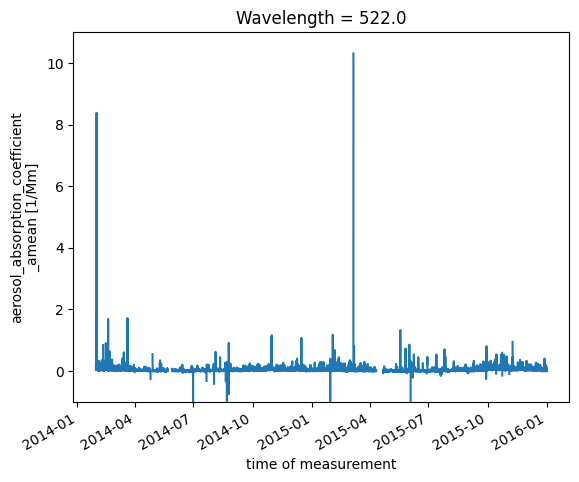

In [49]:
fig = ds.aerosol_absorption_coefficient_amean.plot(ylim=(-1,11))